In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot: >

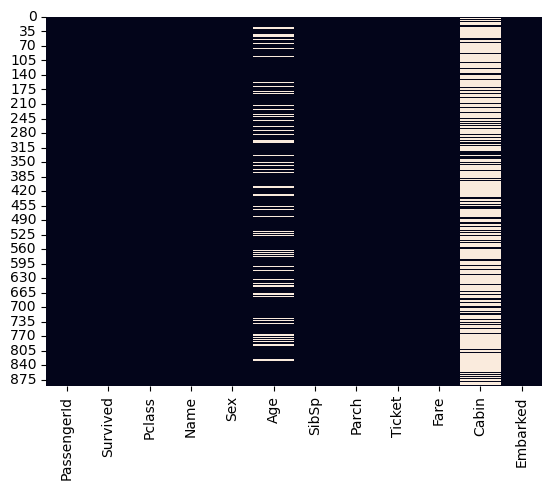

In [19]:
titanic_data = pd.read_csv("../datasets/titanic.csv")
sns.heatmap(titanic_data.isnull(),cbar=False)

<AxesSubplot: xlabel='Survived', ylabel='count'>

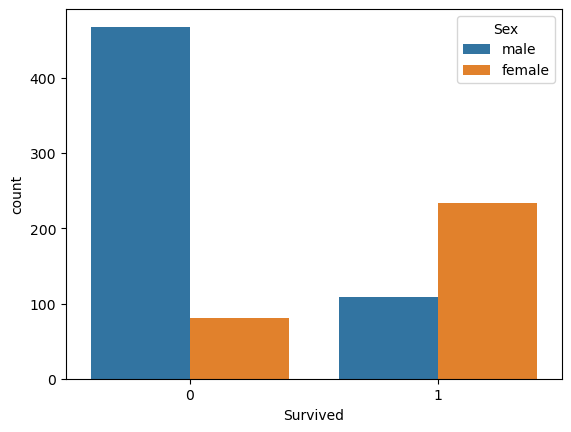

In [20]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

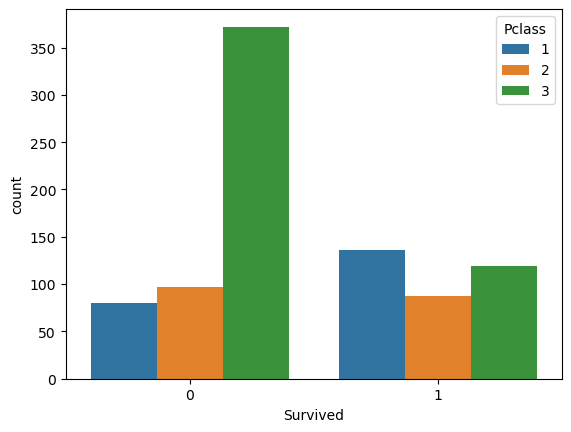

In [21]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

In [22]:
def get_age(row):
   if pd.isnull(row["Age"]):
      same_class = titanic_data[titanic_data["Pclass"] == row["Pclass"]]
      return same_class["Age"].mean()
   else:
     return row["Age"]

titanic_data["Age"] = titanic_data[["Age","Pclass"]].apply(get_age ,axis=1)
titanic_data.drop("Cabin",axis=1,inplace=True)
titanic_data.dropna(inplace=True)


<AxesSubplot: >

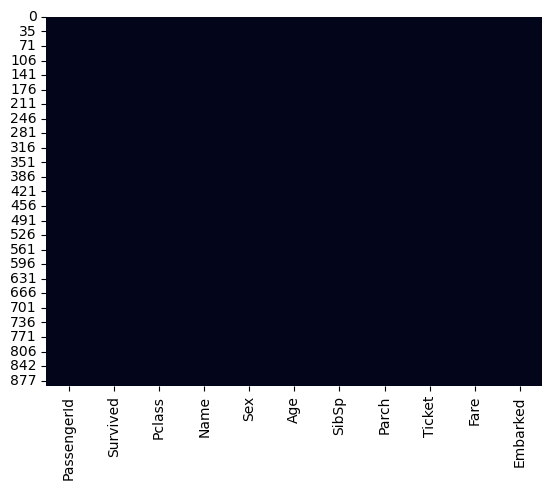

In [23]:
sns.heatmap(titanic_data.isnull(),cbar=False)

In [24]:
sex_data = pd.get_dummies(titanic_data["Sex"]).astype(int)
embarked_data = pd.get_dummies(titanic_data['Embarked']).astype(int)
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)
titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace= True)
titanic_data.head(5)


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [26]:
X = titanic_data.drop("Survived",axis = 1)
y = titanic_data["Survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [27]:
print("************Classification Report************\n")
print(classification_report(y_test, predictions))
print("***********Confusion Matrix***************")
print(confusion_matrix(y_test, predictions))

************Classification Report************

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       165
           1       0.72      0.70      0.71       102

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267

***********Confusion Matrix***************
[[137  28]
 [ 31  71]]
